# Ober- und Untersumme

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})


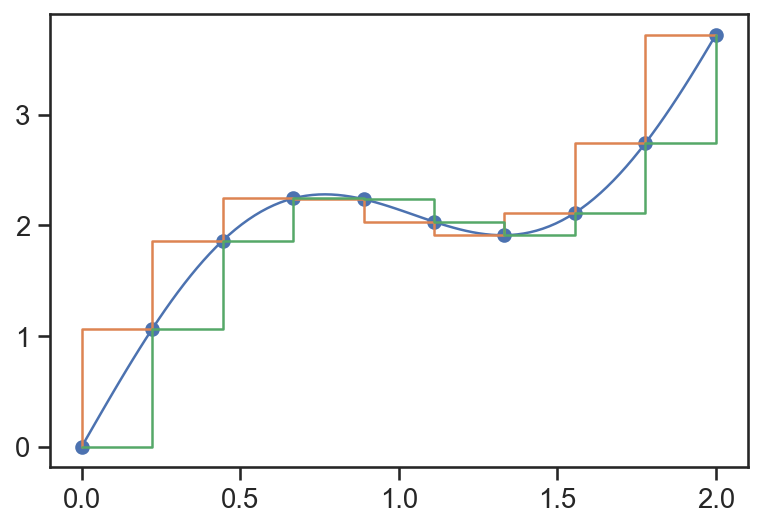

In [10]:
x = np.linspace(0, 2, 100)
y = np.sin(3*x) + 2*x

xi = np.linspace(0, 2, 10)
yi = np.sin(3*xi) + 2*xi

plt.plot(x, y)
plt.scatter(xi, yi)
plt.step(xi, yi, where='pre')
plt.step(xi, yi, where='post')